In [36]:
from google.colab import drive
drive.mount('/content/drive')
RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import soundfile as sf
import pickle
import librosa
import pathlib
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras 
import os
import cv2
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/BachelorResearch/models/1d', compile=False)
scaler = pickle.load(open(RESEARCH_WORK_PATH + "/models/1d_scaler.pickle", "rb"))

In [71]:
def quality_prediction(audio_path): # return prediction value
  data, sr = librosa.load(audio_path) 
  broken_flag = False

  sum = np.zeros(4)
  for i in range(14):
    # Crop range
    start = i*2*sr
    stop  = (i*2 + 2)*sr
    y = data[start:stop]

    # STFT
    n_fft=512
    hop_length=256
    try: 
      chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
      rmse = librosa.feature.rms(y=y) # librosaのバージョンが0.7.0以上の場合はこちらを実行
      spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
      spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
      rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
      zcr = librosa.feature.zero_crossing_rate(y)
      mfcc = librosa.feature.mfcc(y=y, sr=sr)
      x = [np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw), np.mean(rolloff), np.mean(zcr)]
      for e in mfcc:
        x.append(np.mean(e))
    except ValueError:
      # print("[PASS] No data in", audio_path)
      broken_flag = True
      continue

    x = np.array(x, dtype=float)
    x = np.expand_dims(x,0)
    x = scaler.transform(x)

    # Normalization

    # Data Transform
    # input = np.expand_dims(stft, axis=0)
    # input = np.stack((input,)*3, axis=-1) # forced to make 3 channel img

    # np.set_printoptions(suppress=True)
    # print(input.shape)
    # print(type(input))
    # print(input[0,:,:,0])
    # print(input[0,:,:,1])
    # print(input[0,:,:,2])


    # Predic
    try:
      scores = model.predict(x)
    except ValueError:
      # print("[PASS] Not enough:", audio_path)
      scores = np.zeros(4)
      broken_flag = True
      continue

    # Get sum
    sum = sum + scores
  if broken_flag:
    print(pathlib.Path(audio_path).stem, "seems broken. len:", round(len(data)/sr,4) ,"sec")
  np.set_printoptions(precision=3, suppress=True)
  return sum




def path_to_audiofiles(dir_folder):
    list_of_audio = []
    for file in os.listdir(dir_folder):
        if file.endswith(".wav"):
            directory = "%s%s" % (dir_folder, file)
            list_of_audio.append(directory)
    return list_of_audio

RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"
unknown = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/renamed/unknown/"


In [72]:
# from tqdm import tqdm

data = np.zeros((4,4))

for audio in (path_to_audiofiles(unknown)):
  y = int(pathlib.Path(audio).stem[1])-1
  print("True: Q" +  str(y+1))
  p = np.argmax(quality_prediction(audio))
  print("Pred: Q" +  str(p+1))
  data[y][p] += 1

True: Q1
Pred: Q1
True: Q1


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1763
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=0
  n_fft, y.shape[-1]


Q1.MT0013914319 seems broken. len: 10.08 sec
Pred: Q3
True: Q1
Pred: Q2
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q3
True: Q1
Pred: Q1
True: Q1
Pred: Q4
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q2
True: Q1
Pred: Q1
True: Q1
Pred: Q3
True: Q1
Pred: Q4
True: Q1
Pred: Q1
True: Q1
Pred: Q4
True: Q1
Pred: Q1
True: Q1


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1763
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=0
  n_fft, y.shape[-1]


Q1.MT0013621344 seems broken. len: 10.08 sec
Pred: Q3
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q4
True: Q2
Pred: Q2
True: Q2
Pred: Q1
True: Q2
Pred: Q2
True: Q2
Pred: Q4
True: Q2
Pred: Q2
True: Q2
Pred: Q4
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q4
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q4
True: Q2
Pred: Q1
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q3
Pred: Q3
True: Q3
Pred: Q3
True: Q3
Pred: Q3
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q3
Pred: Q3
True: Q3
Pred: Q3
True: Q3
Pred: Q4
True: Q2
Pred: Q2
True: Q3
Pred: Q1
True: Q3
Pred: Q2
True: Q3
Pred: Q3
True: Q3
Pred: Q3
True: Q3
Pred: Q1
True: Q3
Pred: Q3
True: Q3
Pred: Q3
True: Q3
Pred: Q3
True: Q3
Pred: Q2
True: Q3
Pred: Q1
True: Q3
Pred: Q3
True: Q3
Pred: Q1
True: Q4
Pred: Q4
True: Q3
Pred: Q3
True: Q3
Pred: Q4
True: Q3
Pred: Q3
True: Q3


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=0
  n_fft, y.shape[-1]


Q3.MT0005171805 seems broken. len: 25.9396 sec
Pred: Q3
True: Q3
Pred: Q3
True: Q4
Pred: Q4
True: Q4
Pred: Q4
True: Q4


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=0
  n_fft, y.shape[-1]


Q4.MT0011051663 seems broken. len: 25.5739 sec
Pred: Q4
True: Q4
Pred: Q3
True: Q4
Pred: Q4
True: Q3
Pred: Q4
True: Q4
Pred: Q4
True: Q4
Pred: Q4
True: Q4
Pred: Q3
True: Q4
Pred: Q4
True: Q4
Pred: Q3
True: Q4
Pred: Q4
True: Q4
Pred: Q4
True: Q4
Pred: Q4
True: Q4
Pred: Q2
True: Q4
Pred: Q3
True: Q3
Pred: Q3
True: Q4
Pred: Q3
True: Q4
Pred: Q4
True: Q4
Pred: Q4
True: Q4
Pred: Q1
True: Q4
Pred: Q4
True: Q4
Pred: Q4
True: Q4
Pred: Q4
True: Q4
Pred: Q3
True: Q4
Pred: Q4


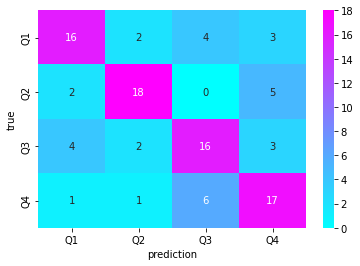

[[16.  2.  4.  3.]
 [ 2. 18.  0.  5.]
 [ 4.  2. 16.  3.]
 [ 1.  1.  6. 17.]]
[[64.  8. 16. 12.]
 [ 8. 72.  0. 20.]
 [16.  8. 64. 12.]
 [ 4.  4. 24. 68.]]


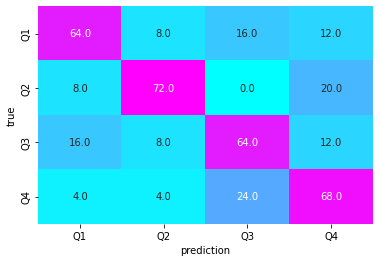

In [73]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

combined_arr = data
xl = ["Q1", "Q2", "Q3", "Q4"]
yl = xl


sns.heatmap(combined_arr, annot=True, fmt=".0f", xticklabels=xl, yticklabels=yl, cmap="cool")
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()
print(combined_arr)
print(np.array(combined_arr)/combined_arr.sum(axis=1)*100)
sns.heatmap(np.array(combined_arr)/combined_arr.sum(axis=1)*100, annot=True, fmt=".1f", xticklabels=xl, yticklabels=yl, cmap="cool", cbar=False)
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()